# Hogwarts Student Clustering with K-Means
In this notebook, **we use K-Means Clustering** to analyze and group students from a fictional Hogwarts-inspired dataset based on their personality traits.

**Goals:**
- Explore if students naturally cluster into distinct "houses".
- Compare discovered clusters to actual house labels.
- Visualize and interpret cluster traits.

Dataset: 4,000 records with behavioral traits and known Hogwarts house labels.



In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, confusion_matrix
from sklearn.decomposition import PCA


In [14]:
#Load the dataset
df=pd.read_csv('hogwarts_dataset.csv')
print(df.head(10))
print(df.columns)

  Social Behaviour   ConflictResolution   MoralAlignment  Intelligence  \
0    ['Extrovert']  ['Confrontational']     ['Idealist']          7.16   
1    ['Introvert']         ['Mediator']  ['Opportunist']          5.01   
2    ['Introvert']         ['Avoidant']      ['Realist']          9.84   
3     ['Ambivert']         ['Mediator']     ['Idealist']          0.07   
4    ['Introvert']         ['Mediator']     ['Idealist']          9.62   
5     ['Ambivert']         ['Mediator']  ['Opportunist']          9.46   
6    ['Introvert']         ['Mediator']      ['Realist']          8.14   
7     ['Ambivert']         ['Mediator']      ['Realist']          4.34   
8    ['Extrovert']  ['Confrontational']     ['Idealist']          9.97   
9     ['Ambivert']         ['Mediator']  ['Opportunist']          7.54   

   Ambition  Loyalty  Leadership  RiskTaker  SenseOfHumor  Curiosity  \
0      7.04     9.34        9.08       9.52          7.09       5.28   
1      9.37     4.33        7.95       8.

In [4]:
# Check data types and missing values
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Social Behaviour    4000 non-null   object 
 1   ConflictResolution  4000 non-null   object 
 2   MoralAlignment      4000 non-null   object 
 3   Intelligence        4000 non-null   float64
 4   Ambition            4000 non-null   float64
 5   Loyalty             4000 non-null   float64
 6   Leadership          4000 non-null   float64
 7   RiskTaker           4000 non-null   float64
 8   SenseOfHumor        4000 non-null   float64
 9   Curiosity           4000 non-null   float64
 10  Adaptibility        4000 non-null   float64
 11  Cunning             4000 non-null   float64
 12  Patience            4000 non-null   float64
 13  House               4000 non-null   object 
dtypes: float64(10), object(4)
memory usage: 437.6+ KB


Social Behaviour      0
ConflictResolution    0
MoralAlignment        0
Intelligence          0
Ambition              0
Loyalty               0
Leadership            0
RiskTaker             0
SenseOfHumor          0
Curiosity             0
Adaptibility          0
Cunning               0
Patience              0
House                 0
dtype: int64

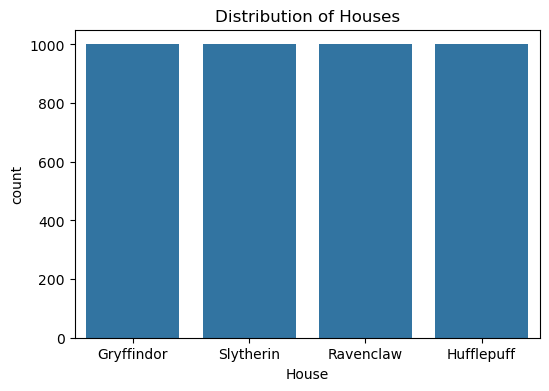

In [15]:
# Class distribution
plt.figure(figsize=(6,4))
sns.countplot(x='House', data=df)
plt.title('Distribution of Houses')
plt.show()

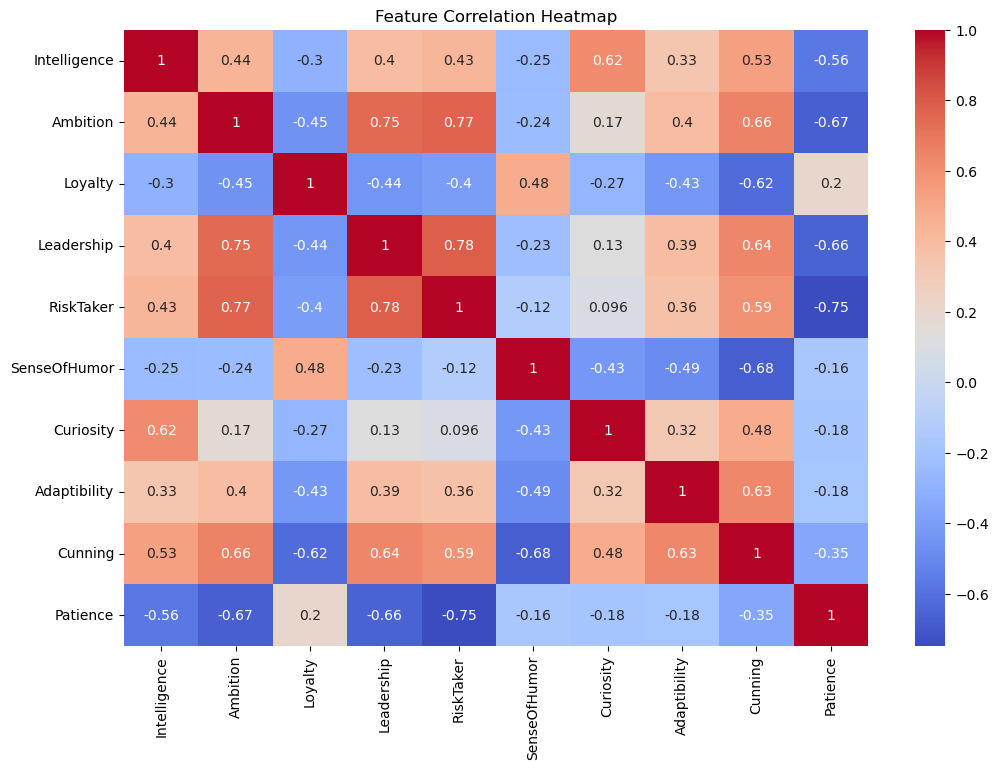

In [16]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


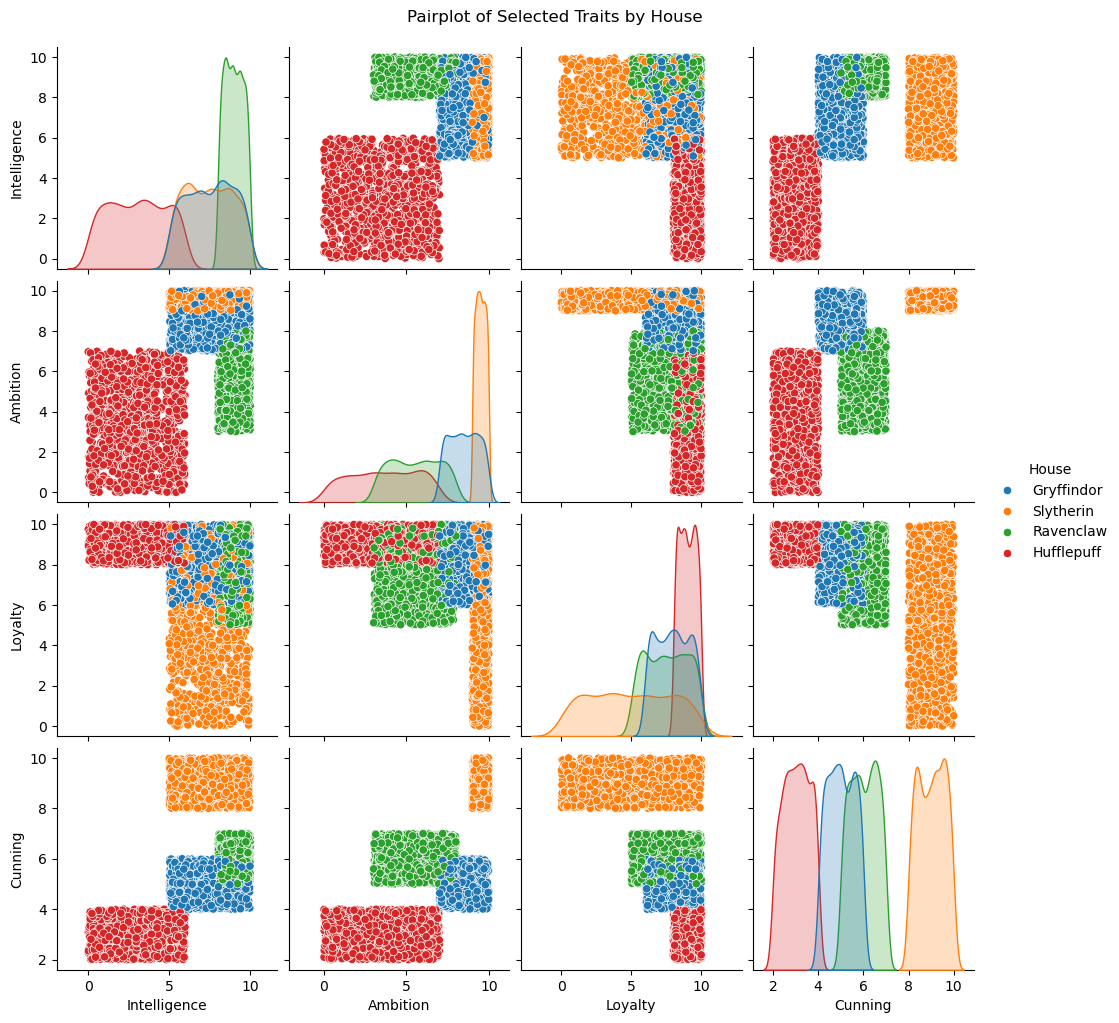

In [17]:
# Pairplot of a few features by House
sns.pairplot(df, hue='House', vars=['Intelligence', 'Ambition', 'Loyalty', 'Cunning'])
plt.suptitle('Pairplot of Selected Traits by House', y=1.02)
plt.show()


In [18]:
X = df.drop(columns=['Social Behaviour', 'ConflictResolution','MoralAlignment','House'], errors='ignore')

####  K-Means Clustering

In [25]:
#Scale the Data
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

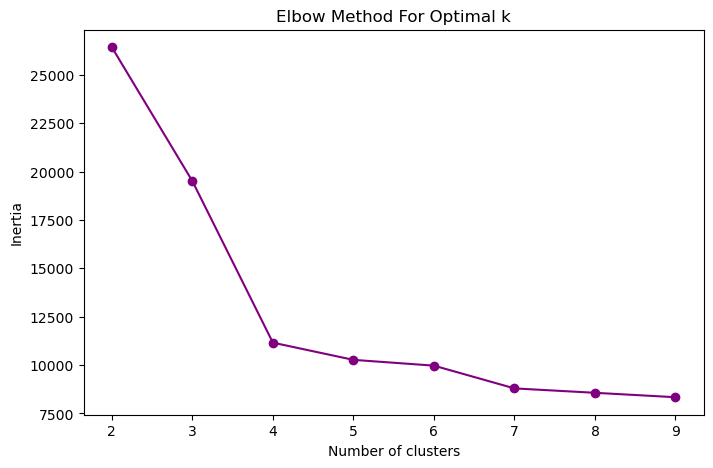

In [20]:
# Choosing Number of Clusters

inertia =[]
K = range(2,10)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    
    plt.figure(figsize=(8,5))
plt.plot(K, inertia, 'o-', color='purple')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

This graph suggests that 4 is the optimal number of clusters for the data this method was applied to, because adding more clusters beyond that point doesn't make the clusters much better or more distinct.

In [21]:
#Fit K-means with k=4
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_scaled)


KMeans(n_clusters=4, random_state=42)

In [22]:
#Add Cluster Labels
df['Cluster'] = kmeans.labels_
print(df.head())


  Social Behaviour   ConflictResolution   MoralAlignment  Intelligence  \
0    ['Extrovert']  ['Confrontational']     ['Idealist']          7.16   
1    ['Introvert']         ['Mediator']  ['Opportunist']          5.01   
2    ['Introvert']         ['Avoidant']      ['Realist']          9.84   
3     ['Ambivert']         ['Mediator']     ['Idealist']          0.07   
4    ['Introvert']         ['Mediator']     ['Idealist']          9.62   

   Ambition  Loyalty  Leadership  RiskTaker  SenseOfHumor  Curiosity  \
0      7.04     9.34        9.08       9.52          7.09       5.28   
1      9.37     4.33        7.95       8.21          3.46       7.62   
2      4.01     7.84        5.21       5.74          4.85       8.99   
3      5.79     9.90        4.69       1.57          7.27       4.19   
4      7.13     9.61        6.98       9.29          7.25       7.40   

   Adaptibility  Cunning  Patience       House  Cluster  
0          8.67     4.63      4.89  Gryffindor        2  
1     

#### Visualize Clusters with PCA

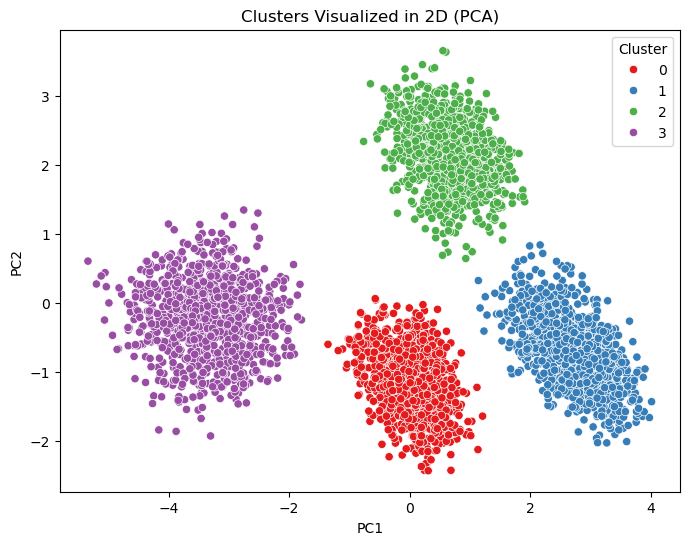

In [24]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df['Cluster'], palette='Set1')
plt.title('Clusters Visualized in 2D (PCA)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Cluster')
plt.show()


In [30]:
# Save the mapping
cluster_to_house = {
    0: 'Ravenclaw',
    1: 'Slytherin',
    2: 'Gryffindor',
    3: 'Hufflepuff'
}

### Crosstab to see overlap


In [69]:
pd.crosstab(df['House'], df['Cluster'])

Cluster,0,1,2,3
House,,,,
Gryffindor,0,0,1000,0
Hufflepuff,0,0,0,1000
Ravenclaw,1000,0,0,0
Slytherin,0,1000,0,0


### Interpretation:
- **Perfect separation**: Each cluster contains students from only one house.
- Cluster–House mapping is clear:
  - Cluster 0 → Ravenclaw
  - Cluster 1 → Slytherin
  - Cluster 2 → Gryffindor
  - Cluster 3 → Hufflepuff
- The personality trait features are highly informative and naturally separate the houses.
- This suggests *strong underlying structure* in the data: K-Means, despite being unsupervised, effectively recovered the Hogwarts house assignments.

In [28]:
# Average trait scores by cluster
cluster_traits = df.groupby('Cluster').mean(numeric_only=True)
cluster_traits.T

Cluster,0,1,2,3
Intelligence,8.98197,7.45960,7.53826,3.01287
Ambition,5.53442,9.50098,8.48477,3.62126
Loyalty,7.52512,4.92288,7.93931,9.00028
Leadership,4.54106,8.46542,7.54253,3.04868
RiskTaker,4.54372,8.55296,8.50704,2.97856
SenseOfHumor,6.00350,4.52426,8.50747,7.49072
Curiosity,8.98308,7.47425,6.46738,5.47822
Adaptibility,8.00210,8.98375,7.51186,7.03422
Cunning,6.01621,9.00982,5.01311,3.03242
Patience,7.50652,7.00306,5.02105,9.50352


In [31]:
# Classify new user
new_user = [[9, 9, 10, 10, 7, 8, 10, 10, 7, 7]]
new_user_scaled = scaler.transform(new_user)
pred_cluster = kmeans.predict(new_user_scaled)[0]
pred_house = cluster_to_house[pred_cluster]

print(f"The player is in {pred_house}!")

The player is in Ravenclaw!


c:\Users\Arya\.conda\envs\ds-project\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# You are summoned to the ruined town of Black Hollow. A portal to hell has opened. The Order of the Veils believes you are the only one who can seal it. You descent into the dungeon with torch in hand, as the stone door seals behind you.

# Question 1
### There a dark passage in front of you where a whispering voice echoes:  
"Only the wise may pass. Choose wrong and be undone."

#### What do you do?
- Speak to the whispering voice.
- Examine the passage carefully.
- Retreat and find an other way.

# Question 2
### A spectral figure in a tattered crown appears. "I see potential in you," it hisses. "Take my mark, and I shall grant you power to leap ahead—at a cost."

- Accept the offer.
- Decline the offer.
- Pretend to accept and betray later.

#### The cost is that you cant leave the dungeon forever

# Question 3
### Walks deeper and comes across a demonic creature. What are you going to do?

- Intimidate the demon to submission
- Be friends with the demon
- Stand your ground and kill the demon
- Call out to the spectral figure for a team up
- Hide quietly and try to stay unseen

# Question 4
### Now you go deeper into the tunnel to reach the portal to hell, on the way you encounted some prisoners, caged. What would you do?

- Leave them, focusing on closing the portal to hell
- Rescue the prisoners

# Question 5
### They grab your leg as you pass, then you decide to rescue the prisoners. They are weak & scared to trust you. There is no clear path out. All eyes turned you.
### What do you do?
- Step up & take charge
- Let someone with more skill lead
- Move ahead alone to secure the path
- Split the group to improve chances
- Test their loyalty
- Find a safe place for them to take shelter

# Question 6 Final Stage
#### The portal demands a prize
#### You and the rescued prisoners reach the source of the portal. Your only way out, it wouldn't close unless a soul is left behind.

#### What do you do ?
- Sacrifice yourself to close the portal
- Ask for a volunteer
- Choose the prisoner you don't like.
- Choose the prisoner that don't trust you
- Use force to sacrifice the weakest prisoner
- Search despirately for a third way
- Push someone when they least expect it

### 